### three hidden layers, sigmoid, squared loss

In [74]:
import numpy as np

'''read the data'''

# Specify the path to the CSV file
path_train = 'data/MNIST_train_1000.csv'
path_test = 'data/MNIST_test_100.csv'


data_train = np.genfromtxt(path_train, delimiter=',', skip_header=0, dtype=int)
data_test = np.genfromtxt(path_test, delimiter=',', skip_header=0, dtype=int)

In [75]:
m,m1 = data_train.shape[0], data_test.shape[0]
ny = 10

In [76]:
'''
get the training and test split and one-hot embedding of labels 

notice that each example is a column
'''

X_train = data_train[:,1:].T/255

Y_train = np.zeros([ny,m])
Y_train[data_train[:,0],range(m)]=1


X_test = data_test[:,1:].T/255

Y_test = np.zeros([ny,m1])
Y_test[data_test[:,0],range(m1)]=1

nx = X_train.shape[0]

In [77]:
'''permute the data for SGD'''

perm_idx = np.random.permutation(m)
X_train = X_train[:,perm_idx]
Y_train = Y_train[:,perm_idx]

In [78]:
'''define mini-batches and set up the number of hidden nodes'''

batch_size = 20
nh1,nh2,nh3 = 100,100,100

In [79]:
'''initialise weights and biases for three layer feed forward fully connected neural network'''

rng = np.random.default_rng()
W1 = (1/nx**0.5)*rng.normal(0,1,[nx,nh1])
b1 = np.zeros([nh1,1])
W2 = (1/nh1**0.5)*rng.normal(0,1,[nh1,nh2])
b2 = np.zeros([nh2,1])
W3 = (1/nh2**0.5)*rng.normal(0,1,[nh2,nh3])
b3 = np.zeros([nh3,1])
W4 = (1/nh3**0.5)*rng.normal(0,1,[nh3,ny])
b4 = np.zeros([ny,1])

In [80]:
''' define a few helper functions and hyperparameters '''
def sig(x):
    return 1/(1+np.exp(-x))

n_batches = int(m/batch_size)
lr = 0.05
n_epoch = 100

errors =[]

In [81]:
''' training '''



for epoch in range(n_epoch):
    error = 0
    # permute the data for SGD
    perm_idx = np.random.permutation(m)
    X_train = X_train[:,perm_idx]
    Y_train = Y_train[:,perm_idx]
    for bat in range(n_batches):
        x_batch = X_train[:,bat*batch_size:(1+bat)*batch_size]
        y_batch = Y_train[:,bat*batch_size:(1+bat)*batch_size]
        # forward pass
        z1 = np.matmul(W1.T,x_batch) + b1
        a1 = sig(z1)
        z2 = np.matmul(W2.T,a1) + b2
        a2 = sig(z2)
        z3 = np.matmul(W3.T,a2) + b3
        a3 = sig(z3)
        z4 = np.matmul(W4.T,a3) + b4
        a4 = sig(z4)
        # backward pass
        e = y_batch - a4
        A4 = sig(z4)*(1-sig(z4))
        S4 = - A4*e
        A3 = sig(z3)*(1-sig(z3))
        S3 = A3*np.matmul(W4,S4)
        A2 = sig(z2)*(1-sig(z2))
        S2 = A2*np.matmul(W3,S3)
        A1 = sig(z1)*(1-sig(z1))
        S1 = A1*np.matmul(W2,S2)
        # gradient descent
        dW4 = np.matmul(a3,S4.T)
        db4 = np.sum(S4, axis = 1, keepdims=True)
        dW3 = np.matmul(a2,S3.T)
        db3 = np.sum(S3, axis = 1, keepdims=True)
        dW2 = np.matmul(a1,S2.T)
        db2 = np.sum(S2, axis = 1, keepdims=True)
        dW1 = np.matmul(x_batch,S1.T)
        db1 = np.sum(S1, axis = 1, keepdims=True)
        W4 -= lr * dW4
        b4 -= lr * db4
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1
        # compute the error 
        error += 0.5*np.sum(e*e)
    # report error of the current epoch
    print("Epoch:", epoch, "TSE:", error)
    errors.append(error)
        
    
    

Epoch: 0 TSE: 469.6318823835026
Epoch: 1 TSE: 452.9002396073345
Epoch: 2 TSE: 452.4348558215131
Epoch: 3 TSE: 452.9400192414007
Epoch: 4 TSE: 452.2519546141117
Epoch: 5 TSE: 451.92079440273403
Epoch: 6 TSE: 452.2636532914381
Epoch: 7 TSE: 451.92814303081013
Epoch: 8 TSE: 451.21750634976644
Epoch: 9 TSE: 450.9319521158411
Epoch: 10 TSE: 451.2451851746739
Epoch: 11 TSE: 450.61720545325534
Epoch: 12 TSE: 449.6011775083856
Epoch: 13 TSE: 449.84328621536787
Epoch: 14 TSE: 449.2201359051634
Epoch: 15 TSE: 448.4304716223497
Epoch: 16 TSE: 447.4783024920154
Epoch: 17 TSE: 445.8824011938382
Epoch: 18 TSE: 443.0264541091534
Epoch: 19 TSE: 439.2657251254331
Epoch: 20 TSE: 430.54163880796835
Epoch: 21 TSE: 416.3881836027115
Epoch: 22 TSE: 401.19164478621747
Epoch: 23 TSE: 384.3840277197916
Epoch: 24 TSE: 364.79640556353775
Epoch: 25 TSE: 343.4502202439308
Epoch: 26 TSE: 320.4013154468869
Epoch: 27 TSE: 296.14800446266923
Epoch: 28 TSE: 275.6292335862288
Epoch: 29 TSE: 260.1035682640938
Epoch: 30 T

Text(0.5, 1.0, '3 hidden, sigmoid, TSE')

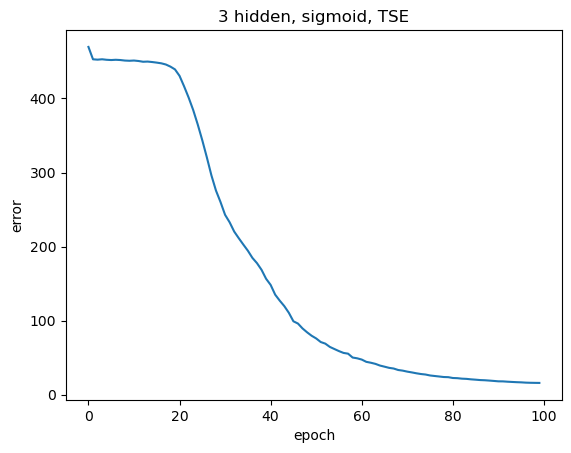

In [82]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('3 hidden, sigmoid, TSE')

# Test  84%

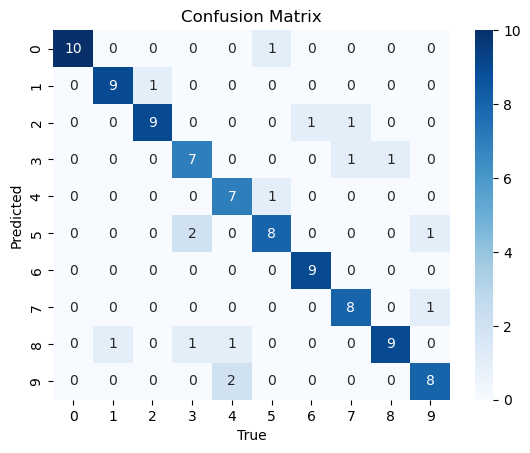

In [83]:
'''Forward pass the test data '''

z1 = np.matmul(W1.T,X_test) + b1
a1 = sig(z1)
z2 = np.matmul(W2.T,a1) + b2
a2 = sig(z2)
z3 = np.matmul(W3.T,a2) + b3
a3 = sig(z3)
z4 = np.matmul(W4.T,a3) + b4
a4 = sig(z4)

''' turn the output into predictions '''

pos = np.argmax(a4, axis =0)
y_pred = np.zeros_like(a4)
y_pred[pos,range(y_pred.shape[1])] = 1

''' compute the confusion matirx '''
confusion = np.zeros([10,10])
for i in range(10):
    for j in range(10):
        confusion[i,j] = np.dot(y_pred[i],Y_test[j])

import seaborn as sns

confusion_int = confusion.astype(int)

sns.heatmap(confusion_int, annot = True, fmt='d', cmap='Blues')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [84]:
np.trace(confusion)/X_test.shape[1]

0.84